# Ways to the Game of Life -- The Fourth Way

*Here we continue upon our dual-purpose journey: to learn Pyton by implementing
a version of Conway's Game of Life. Here we assume you have completed the
previous notebooks to your satisfaction.*

The previous notebooks are designed to introduce you to programming and
problem solving in Python. This notebook is a bit different in that it instead
reinforces the goal of these lessons: data science. From that perspective
Python is (almost) irrelevant, just a tool to be used. Instead of fretting
over our tools, we should first concern ourselves with the science and
the mathematics of our problem.

You are going to encounter mathematics you do not understand, and you are
going to have to implement them programmatically. Sometimes, you will
encounter math you do not understand written in code. The ability to
teach yourself to understand and implement new mathematics is a requirement
of being a data scientist, and it is that pool in which I (probably)
push you into now.

Take a gander at this implementation of the game of life.

[Holoviews implementation](https://holoviews.org/gallery/apps/bokeh/game_of_life.html)

Let's take a look at that in more detail here.

In [7]:
import numpy as np
from scipy.signal import convolve2d

In [8]:
def step(X):
    """Explain this function, X should be a two-dimensional numpy.ndarray object."""
    nbrs_count = convolve2d(X, np.ones((3, 3)), mode='same', boundary='wrap') - X
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

As before, sketch out the flow of objects and types, and where the above
function falls in that outline.

---

The rewards for considering the mathematics and science behind a process is
often the construction of a tool that is expansive, rather than restrictive.
Below I have given you the first few steps in exploring what a 3D game of
life might look like.

In [9]:
import matplotlib.pyplot as plt
from scipy.signal import convolve
from numpy.random import default_rng

rng = default_rng()
%matplotlib inline

In [41]:
def step_3d(X):
    nbrs_count = convolve(X, np.ones((3, 3, 3)), mode='same') - X
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

grid_3d = np.zeros((25, 25, 25))
random_pop = (rng.random(grid_3d.shape) > 0.95).astype(int)
step_3d(random_pop).shape

(25, 25, 25)

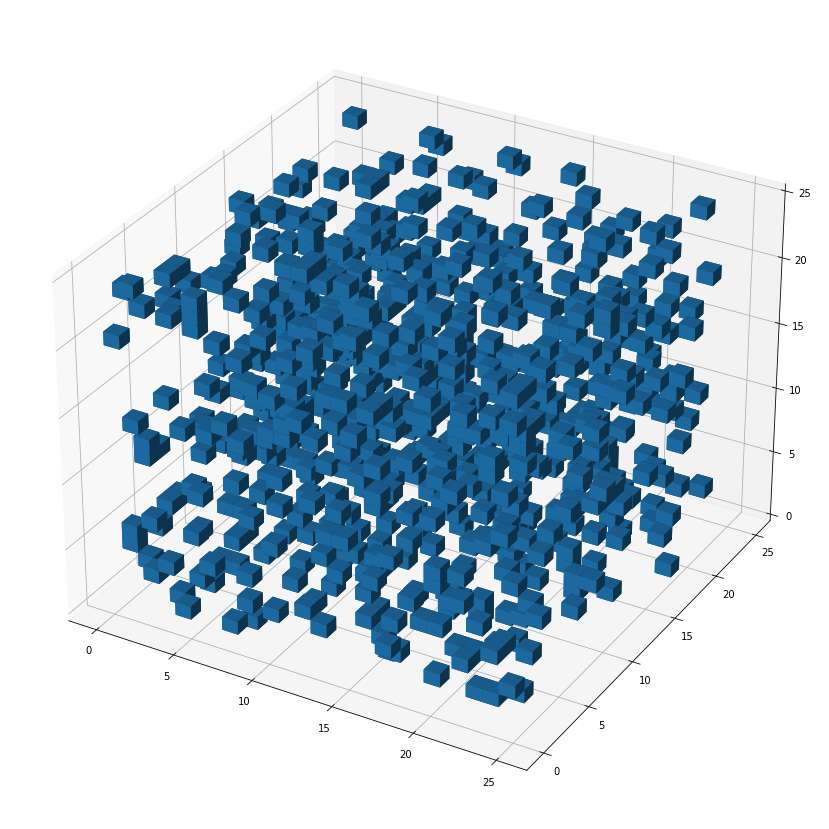

In [39]:
ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
ax.voxels(random_pop);

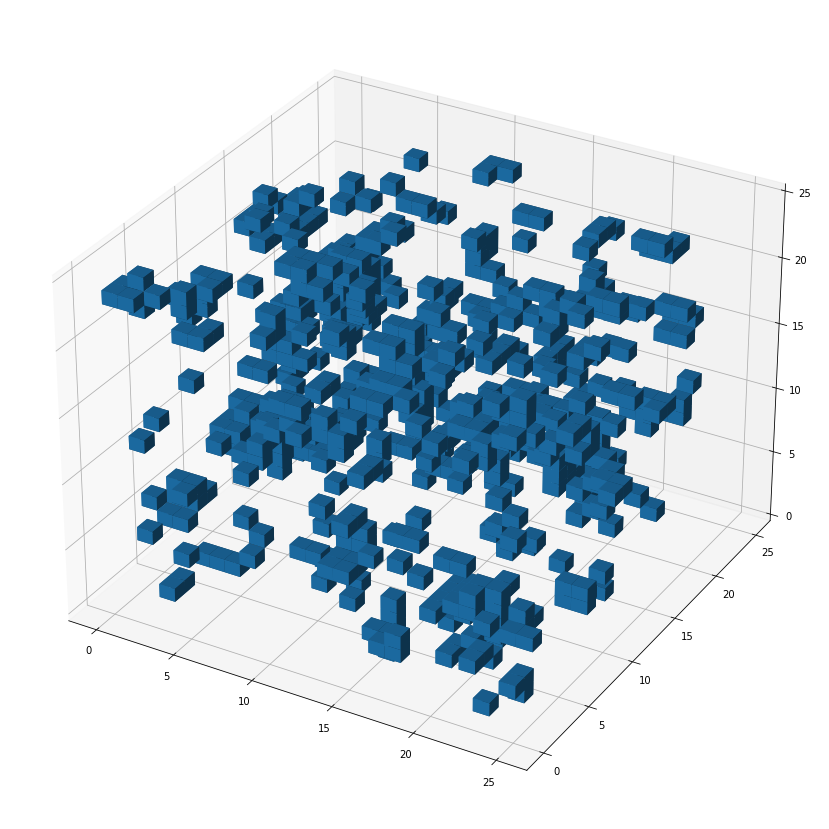

In [40]:
ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
ax.voxels(step_3d(random_pop));

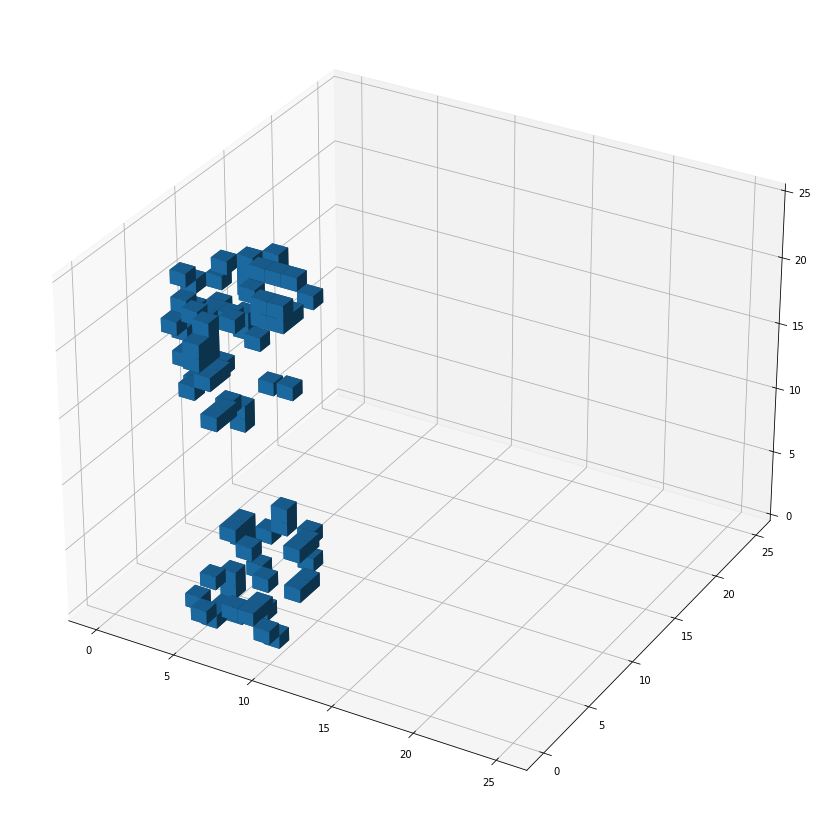

In [42]:
for _ in range(25):
    random_pop = step_3d(random_pop)

ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
ax.voxels(random_pop);